In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')


**About the Dataset**\
**Attribute Information:**
*   age (numeric)
*   job : type of job (categorical:admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')
*   marital : marital status(categorical:'divorced','married','single','unknown')
*   education (categorical: 'primary','secondary','tertiary','unknown')
*   default: has credit in default? (categorical: 'no','yes','unknown')
*   balance: average yearly balance, in euros (numeric)
*   housing: has housing loan? (categorical: 'no','yes','unknown')
*   loan: has personal loan? (categorical: 'no','yes','unknown')
*   contact: contact communication type (categorical:'cellular','telephone')
*   day: last contact day of the month (numeric 1 -31)
*   month: last contact month of year (categorical: 'jan', 'feb','mar', …, 'nov', 'dec')
*   duration: last contact duration, in seconds (numeric).
*   campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
*   pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
*   previous: number of contacts performed before this campaign and for this client (numeric)
*  poutcome: outcome of the previous marketing campaign(categorical: 'failure','nonexistent','success')
*  y: target - has the client subscribed a term deposit? (binary:"yes","no")






**Step 1: Importing data**

In [ ]:
df = pd.read_excel('/content/bank_full_xls.xlsx')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Step 2: EDA**

**2.1 Performing Basic Explanatory Data Analysis**

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
num_cols = df.select_dtypes(int).columns
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df[df.duplicated()].shape

(0, 17)

In [ ]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


As per our problem statement we dont need the contact mode column lets drop that first

In [ ]:
df = df.drop('contact', axis =1)
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,no


In [ ]:
#Selecting Categorical Columns

cat_cols = df.select_dtypes(object).columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
       'poutcome', 'y'],
      dtype='object')

**2.3 Relationship between Features**

In [ ]:
np.round(df.corr(),1)

,age,balance,day,duration,campaign,pdays,previous
age,1.0,0.1,-0.0,-0.0,0.0,-0.0,0.0
balance,0.1,1.0,0.0,0.0,-0.0,0.0,0.0
day,-0.0,0.0,1.0,-0.0,0.2,-0.1,-0.1
duration,-0.0,0.0,-0.0,1.0,-0.1,-0.0,0.0
campaign,0.0,-0.0,0.2,-0.1,1.0,-0.1,-0.0
pdays,-0.0,0.0,-0.1,-0.0,-0.1,1.0,0.5
previous,0.0,0.0,-0.1,0.0,-0.0,0.5,1.0


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'balance'),
  Text(2.5, 0, 'day'),
  Text(3.5, 0, 'duration'),
  Text(4.5, 0, 'campaign'),
  Text(5.5, 0, 'pdays'),
  Text(6.5, 0, 'previous')])

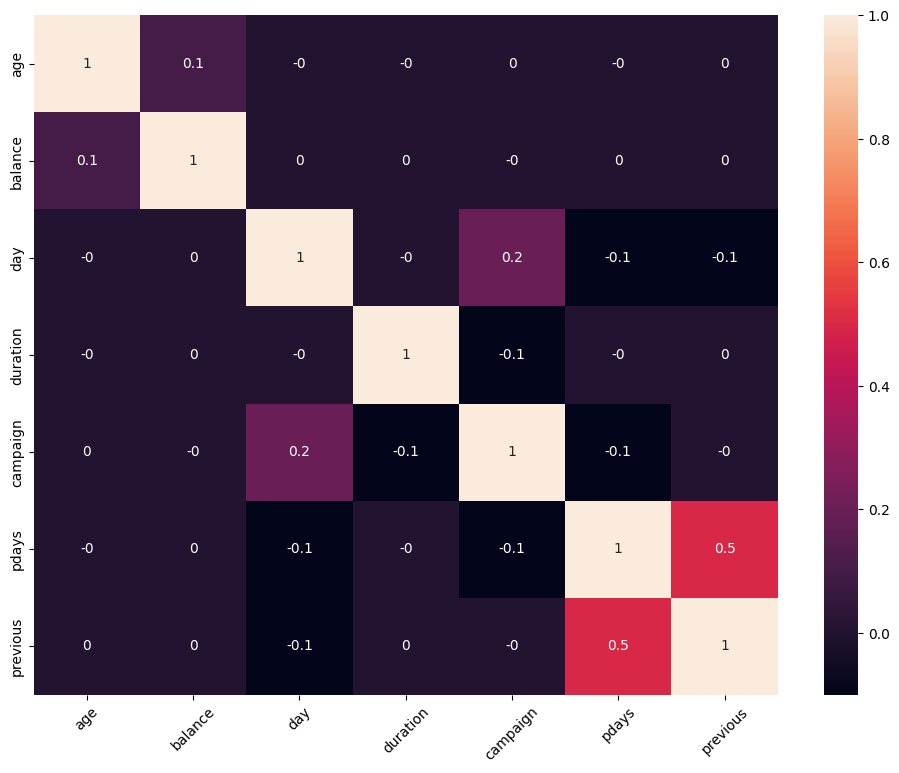

In [ ]:
plt.rcParams ['figure.figsize'] = (12,9)
plt.rcParams ['figure.dpi'] = 100

sns.heatmap(np.round(df.corr(),1), annot=True)
plt.xticks(rotation=45)

**2.4 Outlier Detecction**

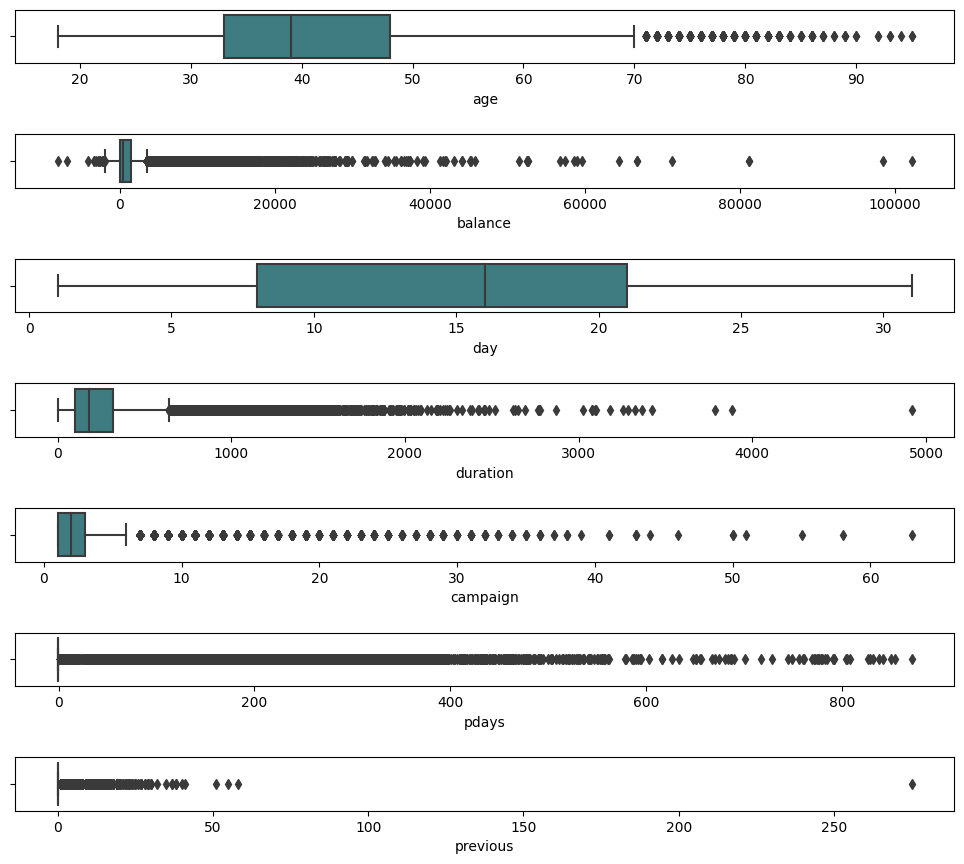

In [ ]:
ot=df.copy() 
fig, axes=plt.subplots(7,1,figsize=(10,9),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

**2.5 Visualization & Analysis of data**

▶ **Analyzing the relationship of categorical features with respect to the Target feature** 

Let's look how numerical columns affect term deposit subscription.



In [ ]:
plt.rcParams ['figure.figsize'] = (8,4)
plt.rcParams ['figure.dpi'] = 80

*1. Job and deposit*

In [ ]:
df[df['y'] == 'yes']['job']

83           admin.
86           admin.
87       technician
129        services
168          admin.
            ...    
45204       retired
45205    technician
45206    technician
45207       retired
45208       retired
Name: job, Length: 5289, dtype: object

In [ ]:
df[df['y'] == 'yes']['job'].value_counts()

management       1301
technician        840
blue-collar       708
admin.            631
retired           516
services          369
student           269
unemployed        202
self-employed     187
entrepreneur      123
housemaid         109
unknown            34
Name: job, dtype: int64

<Axes: title={'center': 'Job and deposit'}>

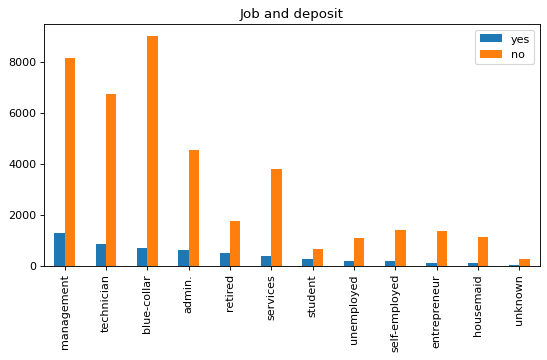

In [ ]:
#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['y'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

<Axes: xlabel='y', ylabel='job'>

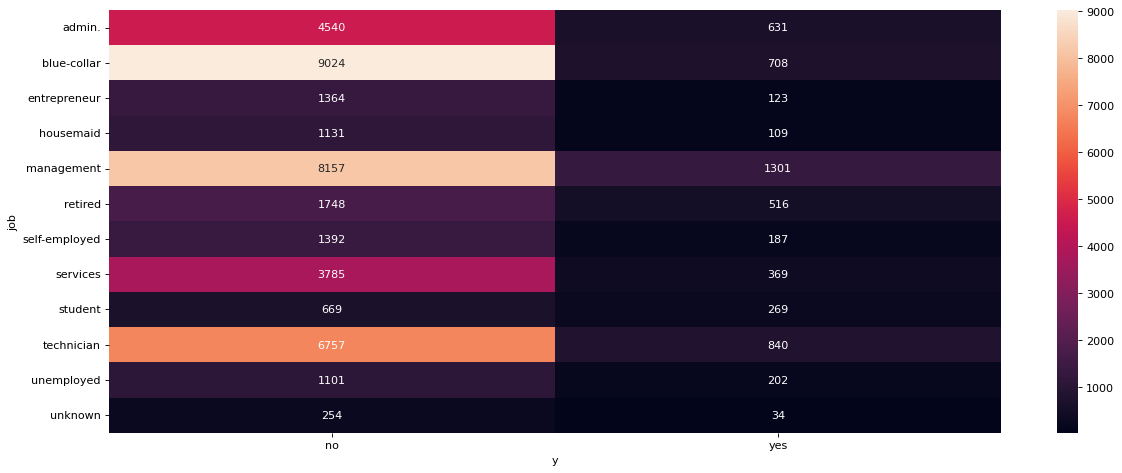

In [ ]:
fig= plt.figure(figsize=(18, 7))

sns.heatmap(pd.crosstab(index= df['job'], columns= df['y']), annot=True, fmt= '2g')       # fmt - string formating - to make all the annotaion visible

*2. Marital Status and deposit*

<Axes: title={'center': 'Marital status and deposit'}>

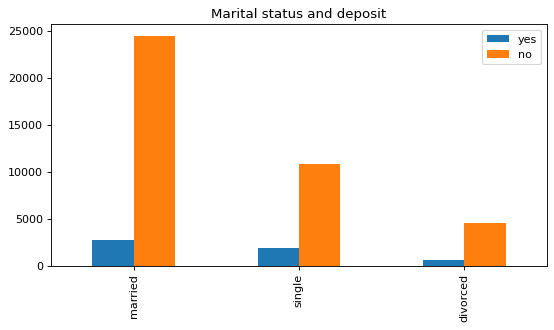

In [ ]:
m_df = pd.DataFrame()

m_df['yes'] = df[df['y'] == 'yes']['marital'].value_counts()
m_df['no'] = df[df['y'] == 'no']['marital'].value_counts()

m_df.plot.bar(title = 'Marital status and deposit')

<Axes: xlabel='y', ylabel='marital'>

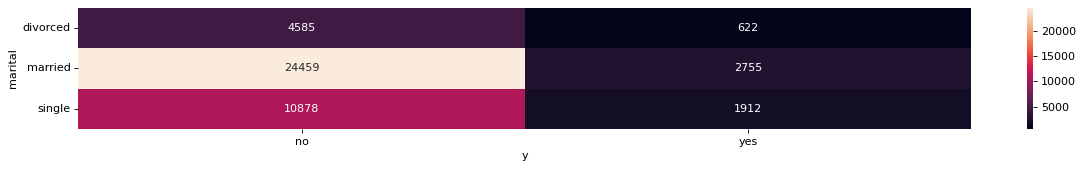

In [ ]:
fig= plt.figure(figsize=(18, 2))

sns.heatmap(pd.crosstab(index= df['marital'], columns= df['y']), annot=True, fmt= '2g')       # fmt - string formating - to make all the annotaion visible

*3. Education and Deposit*

<Axes: title={'center': 'Education and deposit'}>

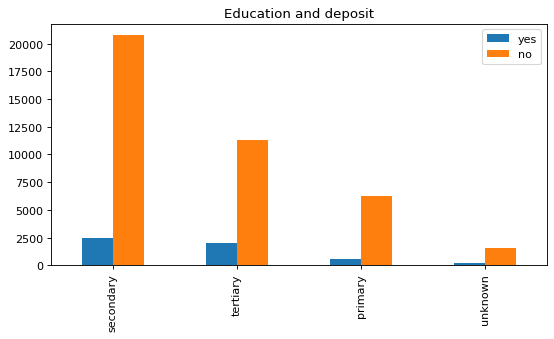

In [ ]:
e_df = pd.DataFrame()

e_df['yes'] = df[df['y'] == 'yes']['education'].value_counts()
e_df['no'] = df[df['y'] == 'no']['education'].value_counts()

e_df.plot.bar(title = 'Education and deposit')

<Axes: xlabel='y', ylabel='education'>

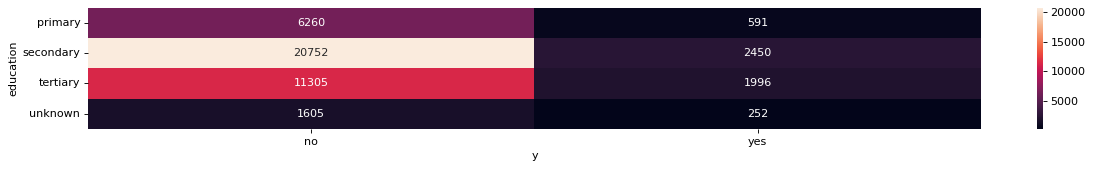

In [ ]:
fig= plt.figure(figsize=(18, 2))

sns.heatmap(pd.crosstab(index= df['education'], columns= df['y']), annot=True, fmt= '2g')      

*4. Default credit and Deposit*

<Axes: title={'center': 'Default Credit and deposit'}>

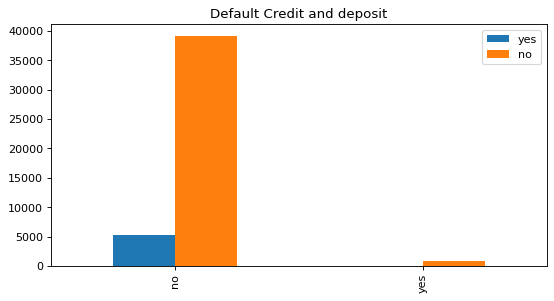

In [ ]:
dc_df = pd.DataFrame()

dc_df['yes'] = df[df['y'] == 'yes']['default'].value_counts()
dc_df['no'] = df[df['y'] == 'no']['default'].value_counts()

dc_df.plot.bar(title = 'Default Credit and deposit')

<Axes: xlabel='y', ylabel='default'>

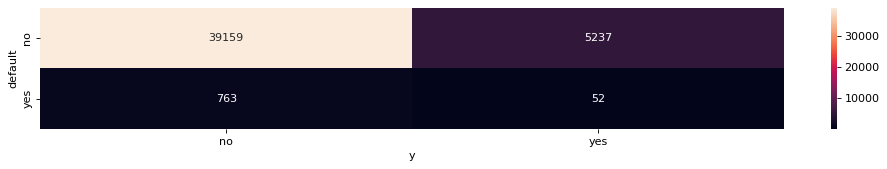

In [ ]:
fig= plt.figure(figsize=(15, 2))

sns.heatmap(pd.crosstab(index= df['default'], columns= df['y']), annot=True, fmt= '2g')      

*5. Housing Loan and deposit*

<Axes: title={'center': 'Housing Loan and deposit'}>

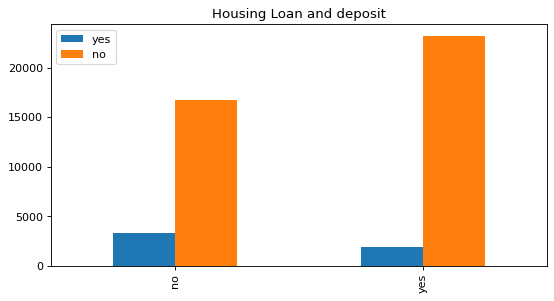

In [ ]:
dc_df = pd.DataFrame()

dc_df['yes'] = df[df['y'] == 'yes']['housing'].value_counts()
dc_df['no'] = df[df['y'] == 'no']['housing'].value_counts()

dc_df.plot.bar(title = 'Housing Loan and deposit')

<Axes: xlabel='y', ylabel='housing'>

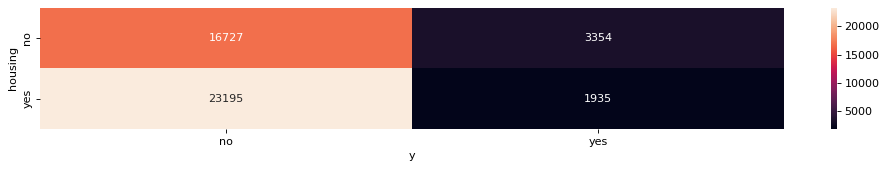

In [ ]:
fig= plt.figure(figsize=(15, 2))

sns.heatmap(pd.crosstab(index= df['housing'], columns= df['y']), annot=True, fmt= '2g',)      

*6. Loan and deposit*

<Axes: title={'center': 'Loan and deposit'}>

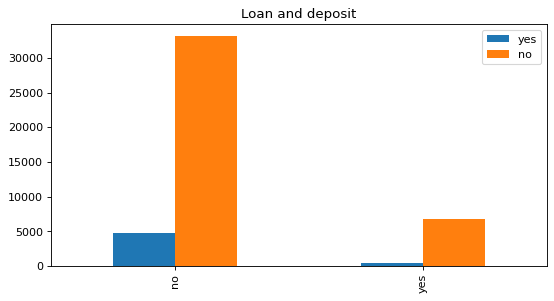

In [ ]:
dc_df = pd.DataFrame()

dc_df['yes'] = df[df['y'] == 'yes']['loan'].value_counts()
dc_df['no'] = df[df['y'] == 'no']['loan'].value_counts()

dc_df.plot.bar(title = 'Loan and deposit')

<Axes: xlabel='y', ylabel='loan'>

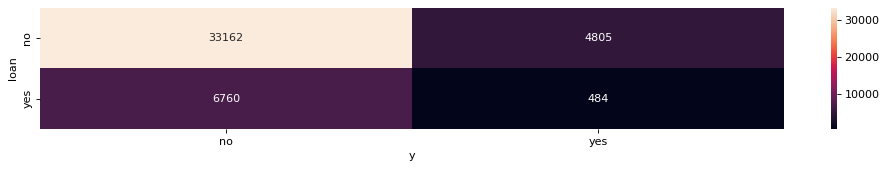

In [ ]:
fig= plt.figure(figsize=(15, 2))

sns.heatmap(pd.crosstab(index= df['loan'], columns= df['y']), annot=True, fmt= '2g')      

Regarding the diagrams we can tell that according to our dataset:


*   Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposit.  

*   Married customers are less likely to subscribe for term deposit.


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

▶ **Analyzing the relationship of Numerical features with respect to the Target feature**

*1.Balance and deposit*

In [ ]:
df[df['y'] =='yes'][['y','balance']]

,y,balance
83,yes,2343
86,yes,45
87,yes,1270
129,yes,2476
168,yes,184
...,...,...
45204,yes,2850
45205,yes,505
45206,yes,825
45207,yes,1729


In [ ]:
df[df['y'] =='yes'][['y','balance']].describe()['balance']

count     5289.000000
mean      1804.267915
std       3501.104777
min      -3058.000000
25%        210.000000
50%        733.000000
75%       2159.000000
max      81204.000000
Name: balance, dtype: float64

In [ ]:
df[df['y'] =='no'][['y','balance']]

,y,balance
0,no,2143
1,no,29
2,no,2
3,no,1506
4,no,1
...,...,...
45194,no,138
45198,no,1428
45199,no,1475
45209,no,668


In [ ]:
df[df['y'] =='no']['balance'].describe()

count     39922.000000
mean       1303.714969
std        2974.195473
min       -8019.000000
25%          58.000000
50%         417.000000
75%        1345.000000
max      102127.000000
Name: balance, dtype: float64

In [ ]:

b_df = pd.DataFrame()
b_df['balance_yes'] = df[df['y'] =='yes']['balance'].describe()
b_df['balance_no'] = df[df['y'] =='no']['balance'].describe()

b_df

,balance_yes,balance_no
count,5289.000000,39922.000000
mean,1804.267915,1303.714969
std,3501.104777,2974.195473
min,-3058.000000,-8019.000000
25%,210.000000,58.000000
50%,733.000000,417.000000
75%,2159.000000,1345.000000
max,81204.000000,102127.000000


<Axes: title={'center': 'Balance and deposit statistics'}>

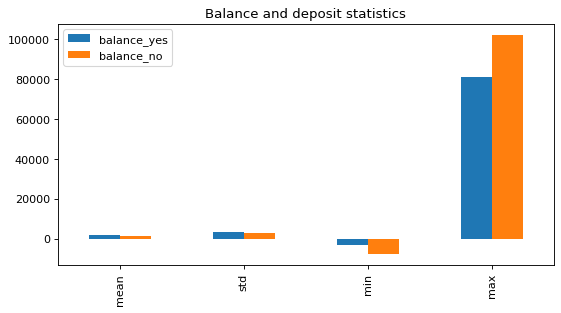

In [ ]:
plt.rcParams ['figure.figsize'] = (8,4)
plt.rcParams ['figure.dpi'] = 80

b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics')

*2. Age and Deposit*

In [ ]:

a_df

,age_yes,age_no
count,5289.000000,39922.000000
mean,41.670070,40.838986
std,13.497781,10.172662
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,95.000000


<Axes: title={'center': 'Age and deposit statistics'}>

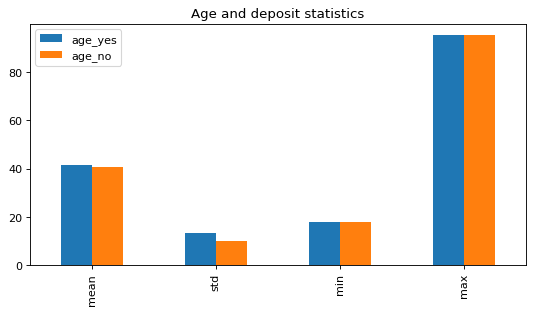

In [ ]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

*3. Number of contacts performed during this campaign ('campaign') and deposit*

In [ ]:
#number of contacts performed during this campaign and deposit
c_df = pd.DataFrame()
c_df['campaign_yes'] = df[df['y'] == 'yes']['campaign'].describe()
c_df['campaign_no'] = df[df['y'] == 'no']['campaign'].describe()

c_df


,campaign_yes,campaign_no
count,5289.000000,39922.000000
mean,2.141047,2.846350
std,1.921826,3.212767
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<Axes: title={'center': 'Number of contacts performed during this campaign and deposit statistics'}>

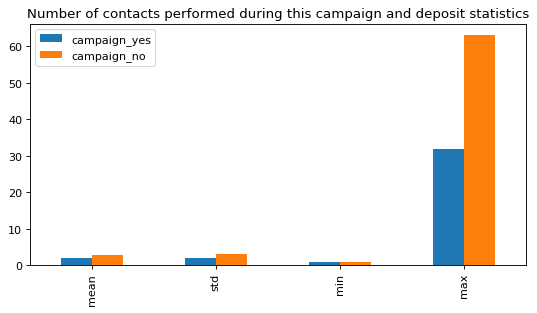

In [ ]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')


*4.  Number of contacts performed during previous campaign ('previous') and deposit*

In [ ]:
#number of contacts performed during previous campaign ('previous') and deposit
p_df = pd.DataFrame()
p_df['previous_yes'] = df[df['y'] == 'yes']['previous'].describe()
p_df['previous_no'] = df[df['y'] == 'no']['previous'].describe()

p_df

,previous_yes,previous_no
count,5289.000000,39922.000000
mean,1.170354,0.502154
std,2.553272,2.256771
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,58.000000,275.000000


<Axes: title={'center': 'Number of contacts performed during previous campaign and deposit statistics'}>

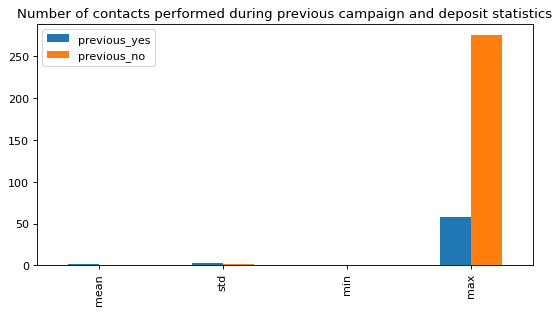

In [ ]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')


Looking at the diagrams above we can conclude that:

*   People who subscribed for term deposit tend to have greater balance and age values. People who subscribed for term deposit tend to have fewer number of contacts during this campaign.




**3. Model Building**

**3.1 Encoding of data**

In [ ]:
#Applying Ordinal encoding on all the categorical columns

from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [ ]:
#Selecting Categorical Columns

cat_cols = df.select_dtypes(object).columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
       'poutcome', 'y'],
      dtype='object')

In [ ]:
df[cat_cols] = oe.fit_transform (df[cat_cols])
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,5,8.0,261,1,-1,0,3.0,0.0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,5,8.0,151,1,-1,0,3.0,0.0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,5,8.0,76,1,-1,0,3.0,0.0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,5,8.0,92,1,-1,0,3.0,0.0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,5,8.0,198,1,-1,0,3.0,0.0


Here 1 = Yes and 0 = No for all binary columns 

**3.2 Splitting of Data**

In [ ]:
#here our target column is y(term deposit - Yes/No), we want to predict this, so this will be our Y
#X will contain the rest of the necessary record, that will be all the cols except y(term deposit - Yes/No) col

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split (x, y, train_size = 0.80, random_state=1)   #Train size = 80%, so rest 20% will be automatically taken for training

In [ ]:
df.shape

(45211, 16)

In [ ]:
xtrain.shape

(36168, 15)

In [ ]:
xtest.shape

(9043, 15)

**3.3 Model Building**

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [ ]:
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)
ypred

array([0., 0., 0., ..., 0., 0., 0.])

**3.4 Model Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
cm = confusion_matrix (ytest, ypred)
cm

array([[7839,  154],
       [ 865,  185]])

Text(57.777777777777786, 0.5, 'Predicted Values')

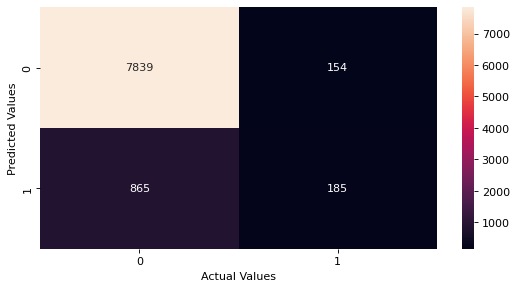

In [ ]:
sns.heatmap(confusion_matrix(ytest, ypred), annot = True, fmt ='g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [ ]:
print(classification_report (ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      7993
         1.0       0.55      0.18      0.27      1050

    accuracy                           0.89      9043
   macro avg       0.72      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest,ypred)

0.887316156142873



*   Here we are concerned about inc. the possibility of predicting positive as positive, so we concentrate more in increasing the recall value
*   Recall = TP/TP+FN => Total percentage of how much term deposit subcription is my model able to predict correctly out of total term deposit subcriptions made.





In [ ]:
#Selecting the probability of record being class 1

proba = lg.predict_proba(xtest)
proba                             #now this is showing probabity of y being in class 0 and prob of y being in class 1  [P(0),P(1)] while default threshold being 0.5 
                                  # so we are concerned only about inc. the values in class 1, so lets take only that 

array([[0.96208057, 0.03791943],
       [0.92004879, 0.07995121],
       [0.61975721, 0.38024279],
       ...,
       [0.95169565, 0.04830435],
       [0.99782371, 0.00217629],
       [0.90939718, 0.09060282]])

In [ ]:
proba = lg.predict_proba(xtest)[:,1]       #we are concerned only about inc. the values in class 1, so lets take only that 
proba

array([0.03791943, 0.07995121, 0.38024279, ..., 0.04830435, 0.00217629,
       0.09060282])

**4. ROC AUC Curve**

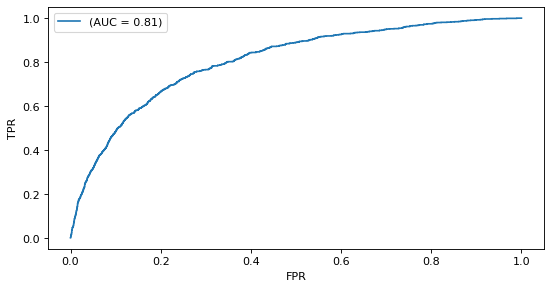

In [ ]:
#plot the roc auc curve for prediction and probabilities

auc = roc_auc_score(ytest,proba)
fpr,tpr, threshold = roc_curve(ytest,proba)

plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

**5.Threshold Selection**

In [ ]:
#threshold values

threshold


array([1.99989919e+00, 9.99899186e-01, 9.95121210e-01, ...,
       7.43560104e-04, 7.40832578e-04, 7.47783935e-07])

In [ ]:
accuracy = []

for i in threshold:
  ypred = np.where(proba>i,1,0)    #store each value of threshold in i,if probability > threshold, predict y as 1 otherwise 0
  accuracy.append(accuracy_score(ytest,ypred))                 #store the accuracy of each threshold value

In [ ]:
accuracy

[0.8838880902355413,
 0.8838880902355413,
 0.8835563419219286,
 0.8838880902355413,
 0.8839986730067455,
 0.8838880902355413,
 0.8839986730067455,
 0.8841092557779497,
 0.8842198385491541,
 0.8841092557779497,
 0.8842198385491541,
 0.8842198385491541,
 0.8841092557779497,
 0.8839986730067455,
 0.8841092557779497,
 0.8839986730067455,
 0.8839986730067455,
 0.8841092557779497,
 0.8842198385491541,
 0.8841092557779497,
 0.8841092557779497,
 0.8839986730067455,
 0.8841092557779497,
 0.8839986730067455,
 0.8841092557779497,
 0.8839986730067455,
 0.8841092557779497,
 0.8844410040915626,
 0.8844410040915626,
 0.8852150834899922,
 0.8853256662611965,
 0.8852150834899922,
 0.8853256662611965,
 0.8853256662611965,
 0.8852150834899922,
 0.885104500718788,
 0.885104500718788,
 0.8849939179475838,
 0.885104500718788,
 0.885546831803605,
 0.8854362490324007,
 0.8853256662611965,
 0.8854362490324007,
 0.8853256662611965,
 0.8854362490324007,
 0.8853256662611965,
 0.8853256662611965,
 0.88521508348999

In [ ]:
#Now to display threshold and accuracy together
#theshold is in form of array, accuracy is in form of list

threshold_selection  = pd.concat([pd.Series(threshold),pd.Series(accuracy)], axis =1)
threshold_selection


,0,1
0,1.999899e+00,0.883888
1,9.998992e-01,0.883888
2,9.951212e-01,0.883556
3,9.906655e-01,0.883888
4,9.895761e-01,0.883999
...,...,...
1574,5.622187e-03,0.145195
1575,5.587883e-03,0.145085
1576,7.435601e-04,0.124737
1577,7.408326e-04,0.124627


In [ ]:
#to incorprate column names

threshold_selection.columns = ('Threshold', 'Accuracy')
threshold_selection

,Threshold,Accuracy
0,1.999899e+00,0.883888
1,9.998992e-01,0.883888
2,9.951212e-01,0.883556
3,9.906655e-01,0.883888
4,9.895761e-01,0.883999
...,...,...
1574,5.622187e-03,0.145195
1575,5.587883e-03,0.145085
1576,7.435601e-04,0.124737
1577,7.408326e-04,0.124627


In [ ]:
#To sort by accuracy and see the threshold that has the highes accuracy

threshold_selection.sort_values(by = 'Accuracy', ascending = False).head()

,Threshold,Accuracy
148,0.536904,0.888201
147,0.537755,0.888090
149,0.536618,0.888090
152,0.532142,0.887980
160,0.511584,0.887980


In [ ]:
# so now i want to tell my model that i want to change my threshold as 0.536904 since it has the highest accuracy

from sklearn.preprocessing import binarize

final_ypred = binarize([proba], threshold = 0.536904)[0]        #[0] to convet to 1D array
final_ypred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
#Check the accuracy of the model with selected threshold

print(classification_report(ytest,final_ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      7993
         1.0       0.57      0.16      0.25      1050

    accuracy                           0.89      9043
   macro avg       0.73      0.57      0.59      9043
weighted avg       0.86      0.89      0.86      9043



In [ ]:

accuracy_score(ytest,final_ypred)

0.8880902355413026

**The accuracy of the model is approximately 89% which is a really good model for 
prediction**


0 => Subscription, 1 => Refusal
*   Accuracy has increased from 88.7% to 88.9%.
*   Refusal Precision has become little higher from 55% to 57%
*   Refusal Recall has become little lesser from 18% to 16%


****



In [ ]:
cm1 = confusion_matrix(ytest,final_ypred)
cm1

array([[7866,  127],
       [ 885,  165]])

<Axes: >

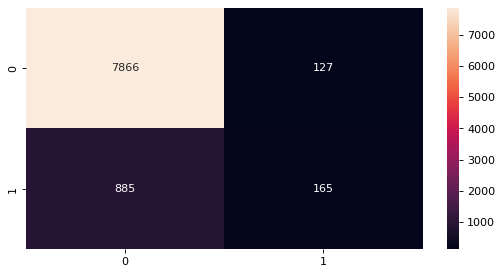

In [ ]:
sns.heatmap(cm1, annot =True, fmt='2g')



*   True Positive (TP) has increased from 7839 to 7866

*   True Negetive (TN) has decreased from 185 to 165

*   False Positive (FP) has reduced from 154 to 127

*   False Negetive (FN) has increased from 865 to 885

So, we have increased the possibility of predicting subscribed (+ve) as subscribed (+ve) by reducing the False positive(reduced the rate of cx has not subscribed but falsely predicted as subsribed) by increasing the threshold to an optimal level. This will increase the False negetive(cx has subscribed but we falsely predicted as subscribed) which can be seen above but we can't afford the false prediction of subscription.

Thereby, we are restricting the false prediction of non subscribed as subscribed.


****



**6. Checking for overfitting or Underfitting in Model**

In [ ]:
print('Training set score:', (lg.score(xtrain, ytrain)*100))

print('Test set score:', (lg.score(xtest, ytest)*100))

Training set score: 88.74142888741429
Test set score: 88.73161561428729


**Training and Testing score are equal. So the model is a generalized / good fit robust model.**

**Conclusion:**

Key outcomes of the analysis are the recommendations for future marketing campaigns:


*   The customer's account balance has a huge influence on the campaign's outcome.

*   The customer's age affects campaign outcome as well.

And about the model,

Out of 9043 data point, model is able to predict 8031 correctly which make the model robust for the prediction.
